In [16]:
import os
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
# win_loc = '/Users/ackmanadmin/Documents/test_dataset_auditory_pipeline/2025-07-17-0/results/seg1 mult 1/windows.npy'
# spont_loc = '/Users/ackmanadmin/Documents/test_dataset_auditory_pipeline/2025-07-17-0/results/seg1 mult 1/spont_win.npy'

# windows = np.array([[  0, 20], [ 20, 100], [100, 500]])
# spont_win = np.array([700, 1000])
# np.save(win_loc, windows)
# np.save(spont_loc, spont_win)

Loading data from: 
	 /Users/ackmanadmin/Documents/test_dataset_auditory_pipeline/2026-02-06-0/results/seg6 mult 10

Kilosort data found at the expected locatation: 
	/Users/ackmanadmin/Documents/test_dataset_auditory_pipeline/2026-02-06-0/kilosort4

Image save location found at the expected locatation: 
	/Users/ackmanadmin/Documents/test_dataset_auditory_pipeline/2026-02-06-0/results/images

Images will be saved at: 
	 /Users/ackmanadmin/Documents/test_dataset_auditory_pipeline/2026-02-06-0/results/images

Loading fit data from 0 Window, [ 0 20] ms:  kent fit win 0

Loading fit data from 1 Window, [ 20 100] ms:  kent fit win 1

Loading fit data from 2 Window, [100 500] ms:  kent fit win 2
/Users/ackmanadmin/Documents/test_dataset_auditory_pipeline/2026-02-06-0/results/images
/Users/ackmanadmin/Documents/test_dataset_auditory_pipeline/2026-02-06-0/results/images/seg6 mult 10
	Processing cluster 0


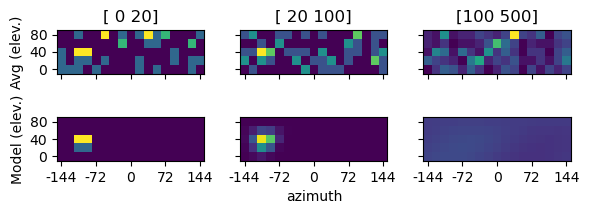

good
[9.0, 11.19047619047619, 3.9050522540135058, 0.8]
(2,)
/Users/ackmanadmin/Documents/test_dataset_auditory_pipeline/2026-02-06-0/results/images/seg6 mult 10/cluster_0_cluster-info.png


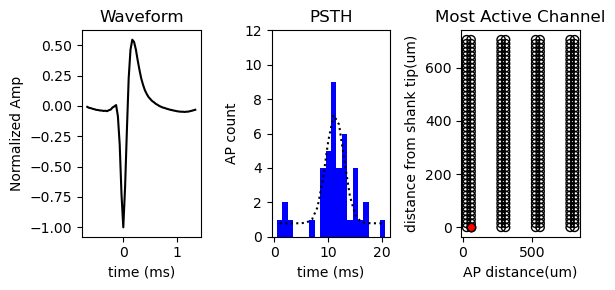

/Users/ackmanadmin/Documents/test_dataset_auditory_pipeline/2026-02-06-0/results/images
/Users/ackmanadmin/Documents/test_dataset_auditory_pipeline/2026-02-06-0/results/images/seg6 mult 10
	Processing cluster 0


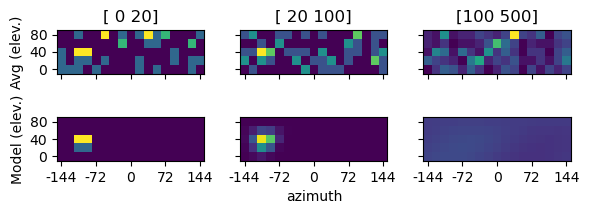

good
[9.0, 11.19047619047619, 3.9050522540135058, 0.8]
(2,)
/Users/ackmanadmin/Documents/test_dataset_auditory_pipeline/2026-02-06-0/results/images/seg6 mult 10/cluster_0_cluster-info.png


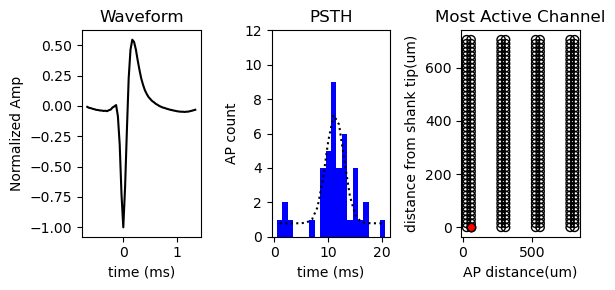

/Users/ackmanadmin/Documents/test_dataset_auditory_pipeline/2026-02-06-0/results/images
/Users/ackmanadmin/Documents/test_dataset_auditory_pipeline/2026-02-06-0/results/images/seg6 mult 10
	Processing cluster 0


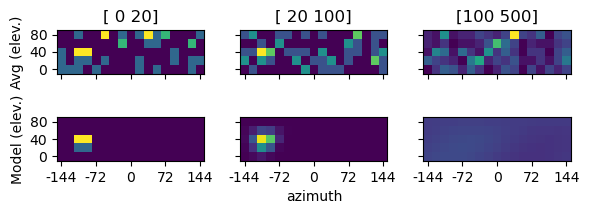

good
[9.0, 11.19047619047619, 3.9050522540135058, 0.8]
(2,)
/Users/ackmanadmin/Documents/test_dataset_auditory_pipeline/2026-02-06-0/results/images/seg6 mult 10/cluster_0_cluster-info.png


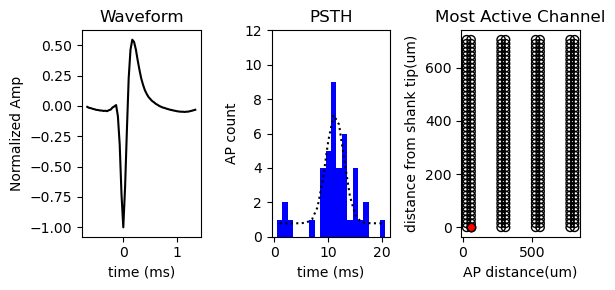

In [22]:
sys.path.append('../python')

from preprocessing import PatternToCount, probeMap
from distributions_fit import gaussian_fit, chiSquaredTest
from visualizations import *

from scipy import optimize
from scipy import stats
from scipy import special

import scipy.io as sio


def plot_RF_neurons(data_obj, neuron_list=None, filetype = 'png'):
    
    for w, window in enumerate(data_obj.windows):
        
        clusters_assessed = data_obj.good_neurons[data_obj.neuron_assess[0]]
        
        if isinstance(neuron_list, list):
            cluster_list = []
            index_list = []
            for neuron in neuron_list:
                if neuron in clusters_assessed:
                    index = np.where(clusters_assessed==neuron)
                    cluster_list.append(neuron)
                    index_list.extend(data_obj.neuron_assess[0][index])
                else:
                    print('\tNeuron {} was not assessed. The plots for this neuron cannot be produced.'.format(neuron))
        else:
            cluster_list = clusters_assessed[:1]
            index_list = data_obj.neuron_assess[0][:1]
        folder = os.path.basename(data_obj.dataloc)
        savedir = os.path.join(data_obj.image_save_loc, folder)
        print(data_obj.image_save_loc)
        print(savedir)
        if not os.path.exists(savedir):
            os.mkdir(savedir)
            print('Making directory at: ', savedir)
            
        which_RFs = np.zeros_like(index_list)
        for i, index in enumerate(index_list):
            which_RFs[i] = data_obj.aic_bic[0][i,2]<data_obj.aic_bic[0][i,3]

        
        for i, index in enumerate(index_list):
            print('\tProcessing cluster {}'.format(cluster_list[i]))
            if which_RFs[i]==1: print('RF neuron!!!!')
            
            savepath = os.path.join(savedir,'cluster_{0}_raster_plot.{1}'.format(cluster_list[i], filetype))
#             PatternRaster3d(data_obj.pattern[index,:,:,0,:], timerange=[0,100], savepath=savepath)
            
            savepath = os.path.join(savedir,'cluster_{0}_model-performance.{1}'.format(cluster_list[i], filetype))
            model_performance(data_obj, index=index, savepath=savepath)
            
            savepath = os.path.join(savedir,'cluster_{0}_cluster-info.{1}'.format(cluster_list[i], filetype))
            cluster_info_waveform(data_obj, cluster=cluster_list[i], index=index, savepath=savepath)

            

            
dataloc = '/Users/ackmanadmin/Documents/test_dataset_auditory_pipeline/2026-02-06-0/results/seg6 mult 10'
data = load_RF_data(dataloc, spikesorting='kilosort4')
plot_RF_neurons(data, neuron_list=None, filetype = 'png')